#                                           DIABETES PREDICTOR                                   by Deepak Mayanattanmy


# Importing all Libraries

In [1]:
#importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
diabetes = pd.read_csv('diabetes.csv')

# Exploratory data analysis

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Filling Zero values

In [6]:
#it is not good to have zero value glucose,blood pressure, skin thickenss, insulin and BMI

diabetes.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
zero_val = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [8]:
#replacing zeros

for i in zero_val:
    #replacing zeros with np.NaN 
    diabetes[i] = diabetes[i].replace(0,np.NaN)
    #calculating the mean excluding NaN values
    mean = int(diabetes[i].mean(skipna=True))
    #filling the mean in the respective colum
    diabetes[i] = diabetes[i].replace(np.NaN,mean)

In [9]:
#checking the columns
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


In [50]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [51]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [52]:
diabetes.to_csv('nonzerodiab.csv')

In [53]:
diabetes1 = pd.read_csv('nonzerodiab.csv')

# Splitting datasets into training and testing

In [10]:
X = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes['Outcome']

In [77]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

array([[ 0.90832902,  0.93641795,  0.44764174, ...,  0.36863635,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81630913, -1.05200558, ..., -0.63294341,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43247278,  1.44740662, ...,  2.81535261,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91552009, -0.63543688, ..., -1.13373329,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.21315299,  0.11438678, ..., -0.36108605,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47343344,  0.7808967 , ..., -0.08922869,
         0.52121586,  2.94889395]])

# Standardizing features
# Rule of thumb: Any algorithm that computes distance or assume normality, SCALING FEATURES MAKES THE BEST PREDICTIONS

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\deepak\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deepak\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
N:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


# KNN modelling

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Setting K neighbor value to 1 initially, and I'm preferring 'euclidean' metric

In [18]:
knn = KNeighborsClassifier(n_neighbors=1,metric = 'euclidean',p=2)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [67]:
a = [{"Pregnancies":2, "Glucose":197, "BloodPressure":70, "SkinThickness":45, "Insulin":543,
       "BMI":30.5, "DiabetesPedigreeFunction":0.158, "Age":53}]

In [72]:
a1 = pd.DataFrame(input)

In [73]:
a1

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
0,53,30.5,70,0.158,197,543,2,45
1,30,26.2,72,0.245,121,112,5,23
2,63,32.9,76,0.171,101,180,10,48
3,37,36.5,88,1.057,128,110,1,39


In [63]:
input = [{"Pregnancies":2, "Glucose":197, "BloodPressure":70, "SkinThickness":45, "Insulin":543,
       "BMI":30.5, "DiabetesPedigreeFunction":0.158, "Age":53},
         {"Pregnancies":5, "Glucose":121, "BloodPressure":72, "SkinThickness":23, "Insulin":112,
       "BMI":26.2, "DiabetesPedigreeFunction":0.245, "Age":30},
        {"Pregnancies":10, "Glucose":101, "BloodPressure":76, "SkinThickness":48, "Insulin":180,
       "BMI":32.9, "DiabetesPedigreeFunction":0.171, "Age":63},
        {"Pregnancies":1, "Glucose":128, "BloodPressure":88, "SkinThickness":39, "Insulin":110,
       "BMI":36.5, "DiabetesPedigreeFunction":1.057, "Age":37}]

output = {"Outcome": [1, 0, 0, 1]}



In [76]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [74]:
predictions = knn.predict(a1)

In [75]:
predictions

array([1, 0, 0, 0], dtype=int64)

In [21]:
len(y)

768

In [22]:
import math

math.sqrt(len(y_test))

12.409673645990857

In [23]:
predictions

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

# Evaluating our Machine Learning Model

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

In [25]:
print(confusion_matrix(y_test,predictions))

[[86 21]
 [17 30]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.59      0.64      0.61        47

   micro avg       0.75      0.75      0.75       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.76      0.75      0.76       154



In [27]:
print(accuracy_score(y_test,predictions))

0.7532467532467533


In [28]:
print(f1_score(y_test,predictions))

0.6122448979591838


# With K = 1, we have got 75% of accuracy, now we can try with other K values with a range from 1 to 50. 

# Choosing the best K value

In [29]:
error_rate = []

for i in range(1,50):
    kn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    kn.fit(X_train,y_train)
    pred_i = kn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

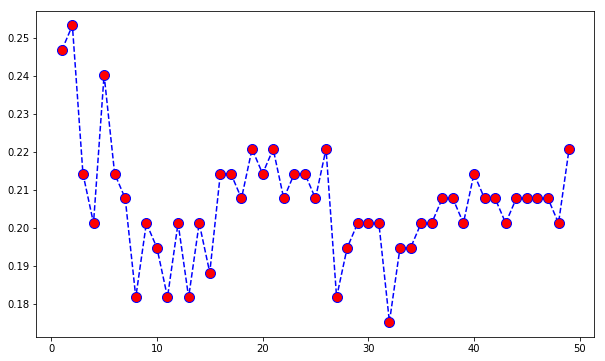

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,linestyle='dashed',color='blue',markersize=10,marker='o',markerfacecolor='red')

# from this graph we can see that, K = 32 seems to be a good fit

In [31]:
#replotting with k=32

knn2 = KNeighborsClassifier(metric = 'euclidean',n_neighbors=32)

In [32]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=32, p=2,
           weights='uniform')

In [61]:
prediction_final = knn2.predict(a)

In [62]:
prediction_final

array([1], dtype=int64)

# Evaluation

# Confusion Matrix

In [34]:
print(confusion_matrix(y_test,prediction_final))

[[98  9]
 [18 29]]


# Classification Report

In [35]:
print(classification_report(y_test,prediction_final))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

   micro avg       0.82      0.82      0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



# Accuracy Score

In [36]:
print(accuracy_score(y_test,prediction_final))

0.8246753246753247


# F1 Score

In [37]:
print(f1_score(y_test,prediction_final))

0.6823529411764706


In [44]:
import pickle as pickle
import requests, json

# End Report:

# My diabetes prediction using K Nearest Neighbors model is 82% accurate provided with Pregnancy, glucose, Blood Pressure, Skin Thickness, Insulin, BMI, DiabetesPedigreeFunction, Age values. 





# Project by,

# Deepak Prasanna Mayanattanmy Yagneswaran 
# Graduate Student in Software Engineering,
# California State University Fullerton


In [46]:
pickle.dump(knn2, open('diabetes_knn2.pkl', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_knn2.pkl'

In [47]:
from flask import Flask, jsonify

In [48]:
app = Flask(__name__)

In [49]:
@app.route('/predict', methods=['POST'])

SyntaxError: unexpected EOF while parsing (<ipython-input-49-6eaea7598ddb>, line 1)